# Homework #7

**See Canvas for the HW #7 assignment and due date**. Complete all of the following problems. Ideally, the theoretical problems should be answered in a Markdown cell directly underneath the question. If you don't know LaTex/Markdown, you may submit separate handwritten solutions to the theoretical problems, but please see the [class scanning policy](https://docs.google.com/document/d/17y5ksolrn2rEuXYBv_3HeZhkPbYwt48UojNT1OvcB_w/edit?usp=sharing). Please do not turn in messy work. Computational problems should be completed in this notebook (using the R kernel). Computational questions may require code, plots, analysis, interpretation, etc. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work. 



## A. Theoretical Problems

## A.1 p-value recommendations

Read the article here: https://bit.ly/2Iw67Xr. In what ways are scientists misusing p-values? Do you agree with the suggestion made in this article? What other suggestions are being made to use them properly?

P values represent the probability of the studied hypothesis to be true, however, scientist are misusing p-values by representing them as likiliness', overtrust in p-values, and fashioning a conclusion based on whether a p-value passed a certain threshold. A $p = 0.2$ is wrongly considered to mean the null hypothesis is $2\%$ likely to be true and the alternative is $98\%$ likely to be correct. Overtrust of smaller p-values do not guarantee full reporting and transparency but considerably the converse - selective reporting and non-transparency. Making a conlusion bases on whether a p-value passed a threshhold is not rigorous enough. 

I do agree that we should reduce the threshold of the p-value from $0.05$ to what threshold, I am not sure. I ultimately think we should reconsider the curricula and train the scientific workforce. In the long run knowing that we are applying a more robust foundation then patching mistakes or creating brief solutions will ensue a better result. 

The other suggestions is to utilize other statistical inference's (Bayesian statistics) when appropiate or adopt better standards for the p-value based on the field of research or study. 

## A.2 Lens thickness

 A sample of 50 lenses used in eyeglasses yields a sample mean thickness of 3.05 mm and a sample standard deviation of 0.34 mm. The desired true average thickness of such lenses is 3.20 mm. Do the data suggest that the true average thickness of such lenses is something other than what is desired? Test using $\alpha = 0.05$.

So we have that $H_0: \mu_0 = 3.20$ and $H_1: \mu_0 \neq 3.20$. 

We want to know if we have evidence against $H_0$. We know what our sample mean and sample sd are therefore we can use a $Z$ test to test if our $Z < z_{\alpha}$
$$\begin{gather*}
    RR: Z < -z_{\alpha/2} , Z > z_{\alpha/2}\\
    \frac{\bar{x}-\mu_0}{\frac{s}{\sqrt{n}}} < -z_{\alpha/2} \\
    \frac{3.05 - 3.20}{\frac{0.34}{\sqrt{50}}} < -1.96 \\
    -3.11 < -1.96
\end{gather*}
$$

Hence we have evidence against $H_0$. That means we dont have enough evidence to show that the true average thickness of such lenses is 3.20 mm. 

## B. Computational Problems

## Problem B.1: Bootstrap confidence interval for standard deviation

Suppose that $X_1,...,X_8 \overset{iid}{\sim} \Gamma(\alpha, \beta)$ (see [here](https://en.wikipedia.org/wiki/Gamma_distribution) for more information on the gamma distribution). Let's use the bootstrap to compute a $90\%$ confidence interval for the population standard deviation: $sd(X) = \sqrt{\alpha/\beta^2} = \theta$.


Note: 

The convention in this course will be to interpret $\Gamma(\alpha, \beta)$ as the "shape/rate" parameterization: shape = $\alpha$, rate = $\beta$. But R uses the "shape/scale" parameterization: shape = $\alpha$, scale = $\theta = 1/\beta$. 

To be sure that you are properly simulating from the right gamma distribution, see the help file for rgamma() (run: ?rgamma).


**B.1(a) There is a "theory-derived" frequentist confidence interval for the standard deviation, which depends on the $\chi^2$ distribution. Research this confidence interval. State why a $\chi^2$ confidence interval is not valid in this context.**

From research, a $\chi^2$ distribution is a special case of the gamma distribution that depends only on one parameter instead of two for the gamma distribution. We cannot use the $\chi^2$ Ci because our gamma distribution depends on two parameters and not one. Furthermore, to use the $\chi^2$ distribution CI our sample must be taken from a normally distributed population. 

**B.1(b) Simulate a sample of size $n = 8$ from $\Gamma(\alpha = 3, \beta = 4)$ and calculate the true population standard deviation (in this example, we are generating data so that we can see how well our estimation procedure will do).**

In [74]:
set.seed(09)
alpha = 3; beta = 4; n = 8
x = rgamma(n = 8, shape = alpha, rate = beta)
popSd = sqrt(alpha/beta^2)
popSd

[1] 0.4330127

**B.1(c) Generate $B = 200$ bootstrap samples from the above sample. Print the dimension, and articulate what each row/column represents. To avoid loops,use the `replicate()` function.**

In [78]:
B = 200; 
bs = replicate(B, sample(x, n, replace=TRUE))
dim(bs)

[1]   8 200

Each column represents the new bootstrap sample $\hat{\theta^*_1} \cdots \hat{\theta^*_B}$. Each row represents the realization of the specific column/bootstrap sample $x^*_{n,1}$ to $x^*_{n,B}$. 

**B.1(d) Calculate and print the sample standard deviation, $s$. Then, calculate $s$ for each bootstrap sample. Denote this as $s^*_i$, for $i = 1,...,B$. To avoid loops, use the `apply()`. Display a histogram of the distribution of  $s^*_i, \,\, i=1,...B$.**

[1] 0.5779552

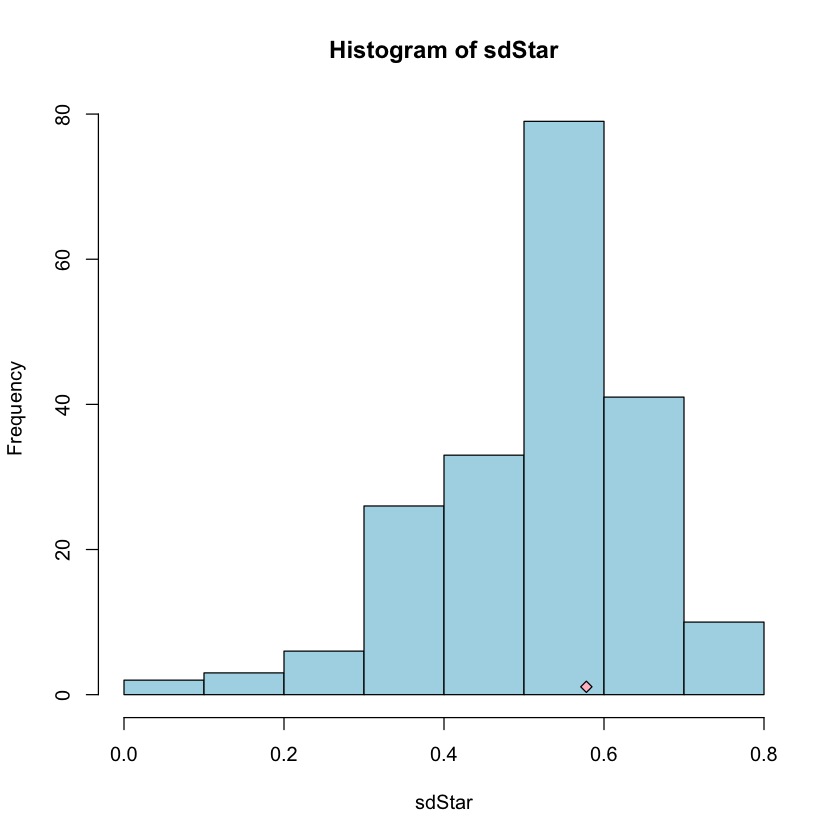

In [96]:
s = sd(x)
s
sdStar = apply(bs, 2, sd)
hist(sdStar, col = "lightblue")
stripchart(s,method = "jitter",pch = 23,bg = "pink",add = TRUE)

**B.1(e) Use the `quantile()` function to find the 5th and 95th percentile of the distribution of  $s^*_i$. Use these values to calculate the $90\%$ boostrap pivot confidence interval and bootstrap percentile confidence interval for $\theta$.**

In [77]:
qL = as.numeric(quantile(sdStar, 0.95))
qU = as.numeric(quantile(sdStar, 0.05))
l = 2*s - qL
u = 2*s - qU
cat("Pivot CI: (", l, ", ", u, ")\n")
l2 = as.numeric(quantile(sdStar, 0.05))
u2 = as.numeric(quantile(sdStar, 0.95))
cat("Percentile CI: (", l2, ", ", u2, ")")

Pivot CI: ( 0.443135 ,  0.8607853 )
Percentile CI: ( 0.295125 ,  0.7127753 )

**B.1(f) Interpret this confidence interval.**

Our bootstrap CI's means that we are 90% confident that the true mean is encompassed in either the pivot CI or percentile CI. These CI's come from a sampling that is roughly normally distributed. That is why I am 90% confident in my bootstrap CI's.  

## Problem B.2: The parametric bootstrap

Suppose that $X_1,...,X_n \overset{iid}{\sim}N(\mu, \sigma^2)$, where $\sigma$ is known, and we are ultimately interested in an estimator for $\theta = \mu^2$.


Thus far, we've been looking at the *nonparametric bootstrap*. In this problem, we look at the *parametric bootstrap* as a way of estimating the bias and variance of an estimator $\widehat{\theta} = \bar{X}^2$ of $\theta = \mu^2$.

**B.2(a) Generate $X_1,...,X_{20} \overset{iid}{\sim}N(\mu = 2, \sigma^2 = 1)$, and then forget that you know $\mu$ and $\sigma^2$. Find the sample mean and sample variance.**

In [707]:
set.seed(0.9)
n = 20; mu = 2; sigma = 1; 
nrm = rnorm(n, mu, sigma); 
m = mean(nrm); 
v = var(nrm)
s = sd(nrm)
cat("Mean: ", m, "\n"); 
cat("Var: " , v, "\n"); 
cat("Sd: ", s); 

Mean:  1.998221 
Var:  1.043445 
Sd:  1.021491

**B.2(b) Define $\widehat{N}$ to be the distribution of the variable $X_i$ in the population with the sample estimates plugged in for the unknown population parameters. Write down $\widehat{N}$ based on the data generated in (a).**

$\widehat{N} = X_i \sim N(1.99, 1.02)$

**(c) Draw $B = 500$ parametric bootstrap samples from $\widehat{N}$, and for each bootstrap sample $(X_{1,j},...,X_{20,j})$, compute $$ \widehat{\theta}^*_j = \bigg(\frac{1}{20}\sum^{20}_{i=1}X^*_{i,j}\bigg)^2,$$ where $j = 1,...,B$.**

In [708]:
set.seed(09)
B = 500; 
nhat = rnorm(n,m,s)
boots = replicate(B, sample(nhat, n, replace = TRUE))
theta = function(x){
    (sum(x)/20)^2
}
thetaHat = apply(boots, 2, theta)

**B.2(d) Compute an estimate of the bias:**

\begin{align*}
\widehat{B}(\widehat{\theta}) \approx \frac{1}{B}\sum^B_{j=1}\widehat{\theta}^*_j - \bar{X}^2.
\end{align*}

**Compare this to the exact bias using the formula $\displaystyle Bias(\widehat{\theta}) = Bias(\bar{X}^2) = E(\bar{X}^2) - \mu^2 = \frac{\sigma^2}{n}$.**

In [710]:
xbar = mean(boots)
biasHat <- function(thetaHat, B,xbar){
    (sum(thetaHat)/B) - xbar^2
}
biasHat(thetaHat,B,xbar)
bias = 1/n
bias

[1] 0.05391937

[1] 0.05

**B.2(e) Compute an estimate of the variance:**

\begin{align*}
\widehat{\text{Var}}(\widehat{\theta}) \approx \frac{1}{B-1}\sum^B_{j=1}\big(\widehat{\theta}^*_j - \bar{\theta} \big)^2,
\end{align*}
where 
\begin{align*}
\bar{\theta} = \frac{1}{B}\sum^B_{j=1}\widehat{\theta}^*_j .
\end{align*}
**Compare this to the exact variance:**

\begin{align*}
Var(\bar{X}^2) &=  4\frac{\sigma^2}{n}\mu^2 + 2\frac{\sigma^4}{n^2}
\end{align*}

In [298]:
thetaBar = sum(thetaHat)/B
varHat <- function(thetaHat, B){
    sum((thetaHat -thetaBar)^2)/(B-1); 
}
varHat(thetaHat, B)
eVar = 4*(s^2/n)*m^2 + 2*s^4/n^2
eVar

[1] 0.7432906

[1] 0.8387156

#### (f) True or False: For a fixed sample size $n = 20$, as $B$ increases, $\widehat{Bias}(\widehat{\theta})$ will approach ${Bias}(\widehat{\theta})$.  That is, for a fixed $n$, the bootstrap estimate of the bias will approach the true bias as the number of bootstrap samples, $B$ increases. You might consider running a simulation to decide!

False. After running multiple simulation $\widehat{Bias}(\hat{\theta})$ does not approach $Bias(\hat{\theta}$. $\widehat{Bias}(\hat{\theta})$ floats around the $Bias(\hat{\theta}$. I think it does not approach $Bias(\hat{\theta})$ because we are always changing the random sample. 

## Problem B.3 Bootstrap with real data

The "Wisconsin Card Sorting Test" is widely used by psychiatrists, neurologists, and neurophycologists with patients who have a brain injury. Patients with any sort of frontal lobe lesion generally do poorly on the test. The data frame WCST contains the test scores from a group of 50 patients from the *Virgen del Camino* Hospital.

**B.3(a) Using the code below, load the WCST data and explore whether there is reason to believe that the score data comes from a non-normal distribution. First, create a histogram (use ggplot!) and describe whether the data look normal. Then, use the function shapiro.test() to explore normality. Be sure to explain what this function does - i.e., what's the null and alternative hypothesis - in your answer.**

In [293]:
wcst = read.table("https://www.colorado.edu/amath/sites/default/files/attached-files/wcst.txt")

[1] 50  1


	Shapiro-Wilk normality test

data:  wcst$score
W = 0.77472, p-value = 2.405e-07


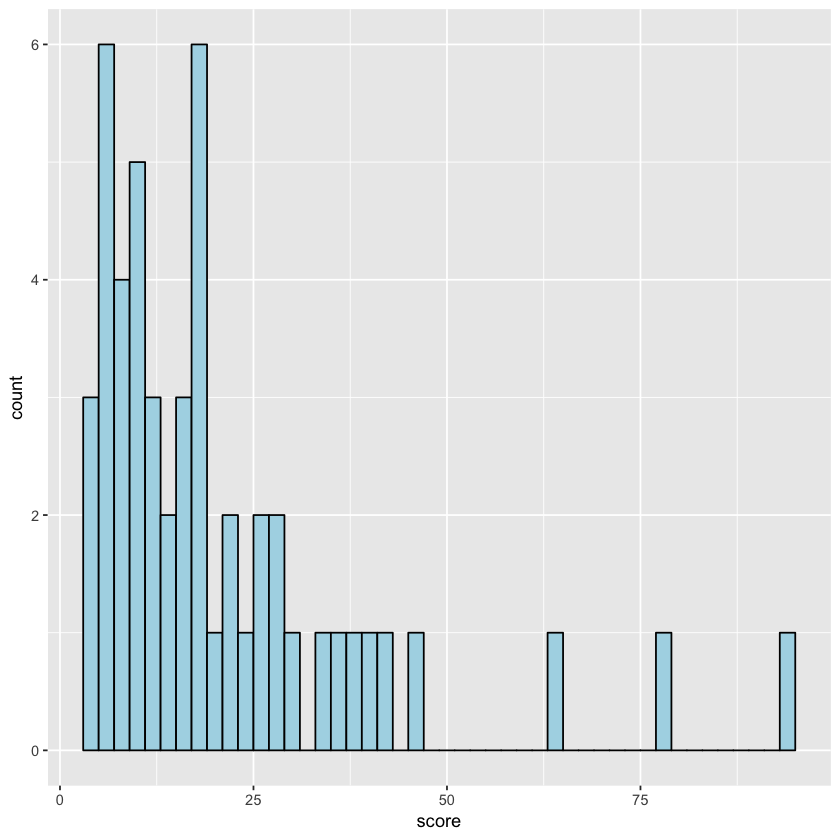

In [345]:
library(ggplot2)
ggplot(wcst, aes(x=score)) + geom_histogram(binwidth=2,color="black", fill="lightblue")
shapiro.test(wcst$score)

The Shapiro-Wilk Test checks if a variable is normally distributed. In our case $p<0.05$, therefore our dataset is not normally distributed. Since $p = .00000024$ that strongly suggest evidence of non-normality and a non-parametric test should be used. The null hyphothesis is $H_0: p \geq 0.05$ and the alternative hypothesis is $H_1: p < 0.05$

**B.3(b) What assumptions must be made in order to compute a (non-boostrap) 95% confidence interval for the population mean score?**

We know that $n = 50$, so to compute a 95% CI for the population mean score we need an IID samples, and the sample standard deviation. 

**B.3(c) Compute the confidence interval referred too in B.3(b).**

In [350]:
n = 50; xbar = mean(wcst$score); s = sd(wcst$score); 
z = qnorm(1 - 0.05/2)
L = xbar -z*s/sqrt(n) 
U = xbar +z*s/sqrt(n) 
cat("95% CI: (", L ,",", U, ")")

95% CI: ( 16.37818 , 26.58182 )

**B.3(d) Compute a 95% bootstrap pivot confidence interval for the mean.**

In [369]:
B =500; xbar = mean(wcst$score)
bstrap = replicate(B, sample(wcst$score,n, replace=TRUE))
muStar = colMeans(bstrap)
l = 2*xbar - as.numeric(quantile(muStar, 0.975))
u = 2*xbar - as.numeric(quantile(muStar, 0.025))
cat("Bootstrap pivot CI: (", l, ",", u, ")")

Bootstrap pivot CI: ( 16.512 , 26.1765 )

## Problem B.4 Bootstrap assumptions 
The dataset gives the number of births per month in New York city, from January 1946 to December 1959. The data are ordered.

**B.4(a) Construct another column in the dataset that labels the month and year for each birth per month record.**

The `as.Date()` function may help with this task.

In [557]:
library(tidyverse)
library(ggplot2)
births = read.table("https://robjhyndman.com/tsdldata/data/nybirths.dat", sep = "\t")
births = data.frame(births)
names(births) = "births"
n = length(births$births)
head(births)

births
26.663
23.598
26.931
24.740
25.806
24.364


In [578]:
YearMonths = seq(from = as.Date("1946-01-01"), to = as.Date("1959-12-01"), by = 'month')
df = data.frame(cbind(births, YearMonths))
head(df)

births,YearMonths
26.663,1946-01-01
23.598,1946-02-01
26.931,1946-03-01
24.740,1946-04-01
25.806,1946-05-01
24.364,1946-06-01


**B.4(b) Construct a plot of births per month against the month/year column that you created in part (a). Analyze the plot. Do you notice anything interesting?**

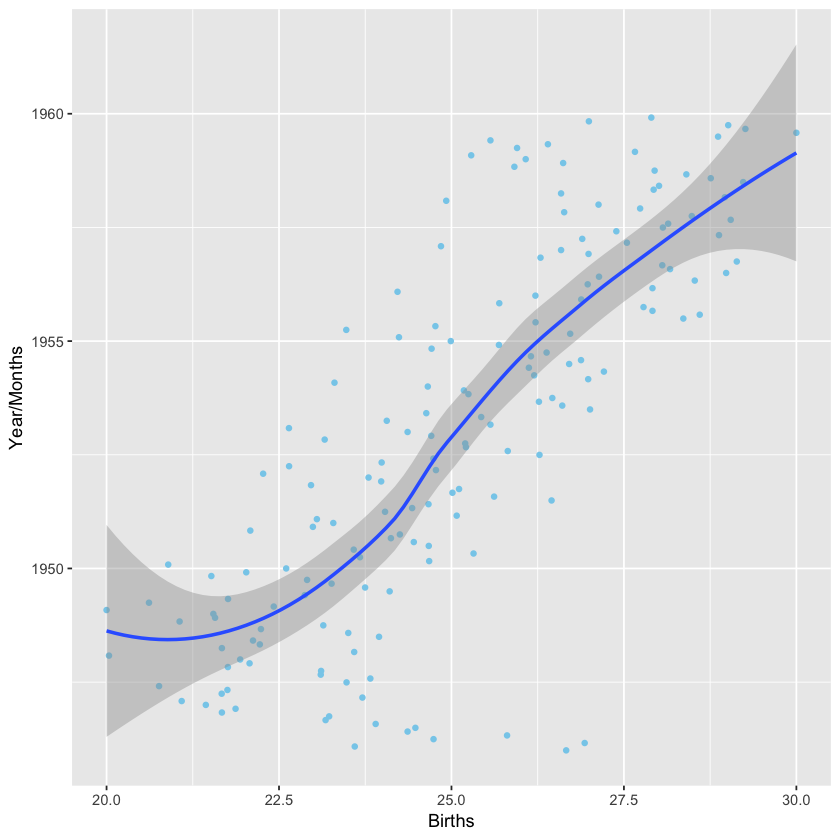

In [583]:
ggplot(df, mapping = aes(x = df$births, y = df$YearMonths))+  xlab("Births")+ ylab("Year/Months") + 
geom_point(colour = 'skyblue', shape = 16) + geom_smooth(method = loess)

**B.4(c) Suppose that your boss asked you to use the bootstrap to construct a confidence interval for the average number of births per month in New York city over the time period in the dataset. Write a short response to your boss describing why this confidence interval is not valid for these data.**

This CI is not valid because the mean increaeses every year and to take a CI we have to have a sample that is IID. Therefore constructing a bootstrap CI interval for births per month is not ideal since the average is not the same for every sampling.

## B.5 Bootstrap hypothesis testing

In this problem, we'll walk through a bootstrap hypothesis test.

The newcomb dataset contains a numeric vector giving the ‘Third Series’ of measurements of the passage time of light recorded by Newcomb in 1882. The given values divided by 1000 plus 24 give the time in millionths of a second for light to traverse a known distance. The ‘true’ value is now considered to be 33.02.

Our goal is to test the hypotheses that $$H_0: \mu = 33.02 \, \, vs. \, \, 
H_1: \mu \ne 33.02.$$

We will choose the $\alpha = 0.05$ level, and use $\bar{X}$ as the test statistic. 

**B.5(a) Load the newcomb data and decide whether you think it comes from a normal distribution.**

In [740]:
library(MASS)
data(newcomb); n = length(newcomb); xbar = mean(newcomb); 
xbar
df = data.frame(newcomb);

[1] 26.21212

In [741]:
shapiro.test(df$newcomb)
# hist(df$newcomb)


	Shapiro-Wilk normality test

data:  df$newcomb
W = 0.59115, p-value = 2.842e-12


No, I do not think that the data comes from a normal distribution. From the shapiro test, the p-value is $p < 0.05$, hence we fail to show that it is a normal distribution. 

Now, since our test statistic is $\bar{X}$, the CLT *might* help us. But maybe not. So, let's assume not (and we might see why later). We'll use the bootstrap to test our hypotheses.

**B.5(b) Shift the data so that the mean is the value under the null.**

In [746]:
nc = df + 6.81
mu_o = 33.02

This shifted data now serves as a stand in for our population under the null. We use it to resample from.

**B.5(c) Resample with replacement from the data $B = 10^5$ times and calculate the mean for each sample. This is the bootstrap distribution of $\bar{X}$.**

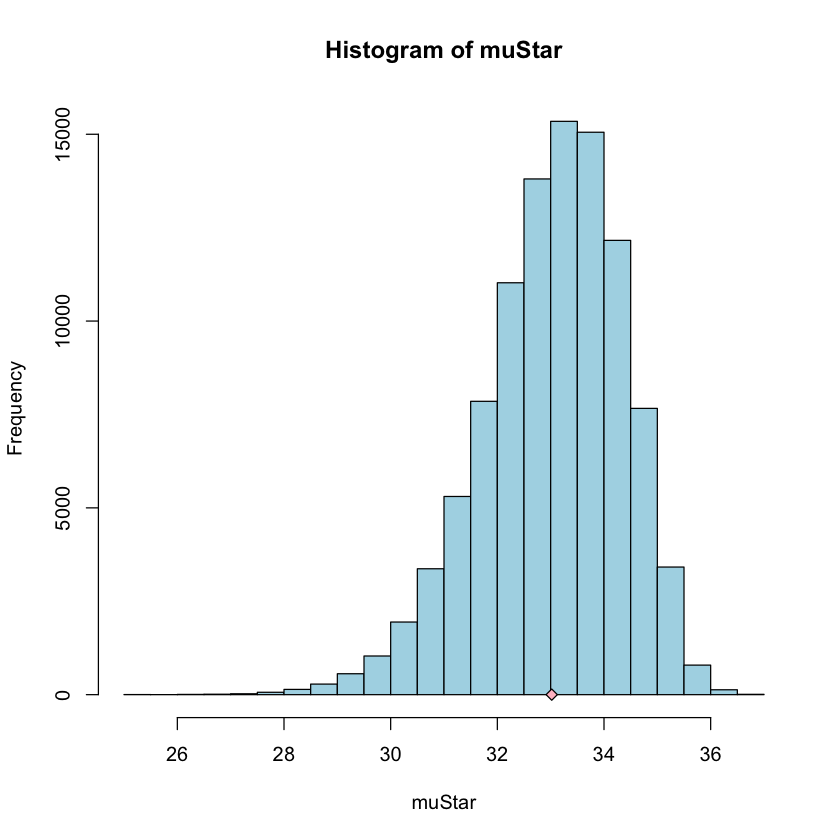

In [762]:
set.seed(099)
B = 10^5; 
bootsy = replicate(B, sample(nc$newcomb, n, replace=TRUE))
muStar = colMeans(bootsy)
hist(muStar,col = "lightblue")
stripchart(mu_o,method = "jitter",pch = 23,bg = "pink",add = TRUE)

YOUR ANSWER HERE

The p-value is the probability of getting something more extreme than what we observed. 26.21--the observed sample mean--is $33.02 - 26.21 = 6.81$ units away from the mean under $H_0$. So our p-value is the probability of being more than 6.81 units away from 33.02.

**B.5(d) Estimate this probability using the bootstrap distribution of $\bar{X}$. Then, use the p-value to make a decision about the hypotheses.**

In [763]:
pvL = sum(muStar < 26.21 | muStar > 39.83 )/B
cat("Left tail p-value: ", pvL, "\n")
alph = 0.05
cat("Two tailed alpha: ", alph/2); 

Left tail p-value:  7e-05 
Two tailed alpha:  0.025

So since $p < \frac{\alpha}{2} \Rightarrow 0.00007 < 0.025 $, we have evidence to reject the null hypothesis. Therefore we have evidence to reject the true mean $\mu_0 = 33.02$. 

## B.6 Other test statistics (extra practice, not graded)

Let $X_1, ..., X_n \stackrel{\text{iid}}{\text{~}} Exp(\lambda)$. A company claims that the lifetime of their lightbulbs is longer than the lifetime of the leading brand, which is six years. You are going to test the hypothesis: $H_0 : \mu \leq 6, H_1 : \mu > 6$. 


**B.6(a) Assume $n > 30$. We know from the CLT that $\bar{X} ∼ N(\mu, \sigma^2/n)$.  Show that $n\bar{X} ∼ N(n\mu, n\sigma^2)$.**

YOUR ANSWER HERE

**B.6(b) You are going to perform a hypothesis test using $\sum_{i=1}^{n}X_i$ instead of $\bar{X}$. What is your test statistic and decision rule for determining whether the null hypothesis should be rejected?**

YOUR ANSWER HERE

**Part B.6(c) Perform the test of hypothesis with $\alpha = 0.005$ using your test procedure, with $n = 45$, $\sum_{i=1}^{n}X_i = 312.85$, and $s = 7.45$.**

YOUR ANSWER HERE

In [ ]:
#YOUR CODE HERE
fail() # No Answer - remove if you provide an answer

YOUR ANSWER HERE

**B.6 (d) What is the p-value of your test? Provide an interpretation of this p-value.**

YOUR ANSWER HERE

In [ ]:
#YOUR CODE HERE
fail() # No Answer - remove if you provide an answer